In [161]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages
import stringdb

from scripts.util import *

In [162]:
result_table = pd.read_csv('DAC-rg3039/RNA-seq/herv/result_table.txt',sep='\t')

In [201]:
data = {}

fc_thr  = 1
pval_thr = 0.05

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

up:  788
down: 641
up:  722
down: 498
up:  788
down: 641
up:  549
down: 546
up:  637
down: 602


In [202]:
data.keys()

dict_keys(['comb_vs_dmso | up', 'comb_vs_dmso | down', 'comb_vs_dmso | no change', 'comb_vs_decitabine | up', 'comb_vs_decitabine | down', 'comb_vs_decitabine | no change', 'comb_vs_rg3039 | up', 'comb_vs_rg3039 | down', 'comb_vs_rg3039 | no change', 'decitabine_vs_dmso | up', 'decitabine_vs_dmso | down', 'decitabine_vs_dmso | no change', 'rg3039_vs_dmso | up', 'rg3039_vs_dmso | down', 'rg3039_vs_dmso | no change'])

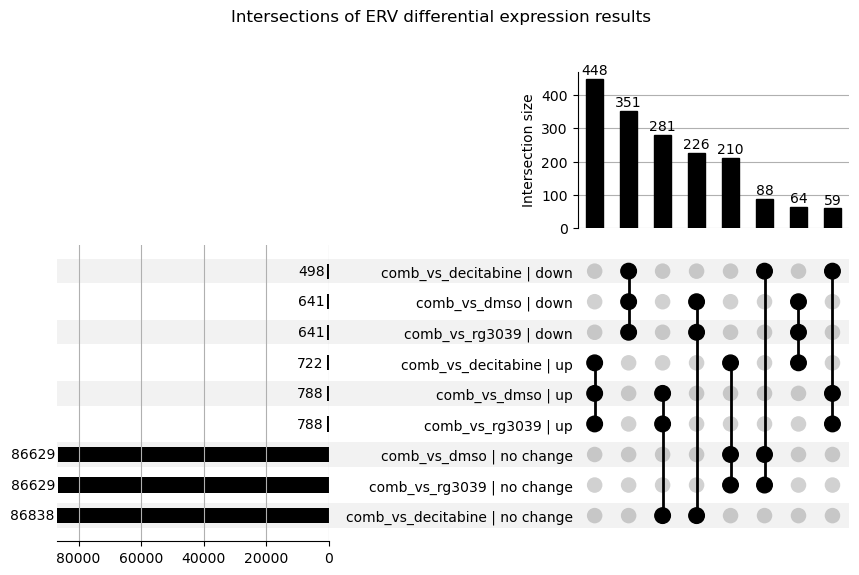

In [221]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if 'comb' in k])), 
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',
    sort_by = 'cardinality',
    max_subset_size = 10000,
    intersection_plot_elements=5,
    totals_plot_elements=8,
    # present=['comb'],
).plot(fig = fig)

fig.suptitle('Intersections of ERV differential expression results')
fig.savefig('DAC-rg3039/RNA-seq/herv/upset.pdf')

In [138]:
!date

Tue Nov 15 00:18:38 PST 2022
